<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Data analysis: exchange rates

In this exercise you will practise what you've learned so far on a new dataset.

The dataset comes from Kaggle, via the Federal Reserve and contains _"data on exchange rates between the US dollar, 23 other currencies, and three benchmark indexes"_

You can read more about the dataset here: https://www.kaggle.com/federalreserve/exchange-rates/data

# Section 1: EDA with `pandas`

### 1. Use `pandas` to load in the dataset (exchange_rates.csv in the data folder)

In [1]:
import pandas as pd

df = pd.read_csv("../data/exchange_rates.csv")
df.head(10)

,Series Description,SPOT EXCHANGE RATE - EURO AREA,"UNITED KINGDOM -- SPOT EXCHANGE RATE, US$/POUND (1/RXI_N.B.UK)",SPOT EXCHANGE RATE - BRAZIL,"CHINA -- SPOT EXCHANGE RATE, YUAN/US$ P.R.","DENMARK -- SPOT EXCHANGE RATE, KRONER/US$","INDIA -- SPOT EXCHANGE RATE, RUPEES/US$","JAPAN -- SPOT EXCHANGE RATE, YEN/US$","KOREA -- SPOT EXCHANGE RATE, WON/US$","MALAYSIA -- SPOT EXCHANGE RATE, RINGGIT/US$",...,"THAILAND -- SPOT EXCHANGE RATE, BAHT/US$",SPOT EXCHANGE RATE - VENEZUELA,Nominal Broad Dollar Index,Nominal Major Currencies Dollar Index,Nominal Other Important Trading Partners Dollar Index,AUSTRALIA -- SPOT EXCHANGE RATE US$/AU$ (RECIPROCAL OF RXI_N.B.AL),"NEW ZEALAND -- SPOT EXCHANGE RATE, US$/NZ$ RECIPROCAL OF RXI_N.B.NZ","CANADA -- SPOT EXCHANGE RATE, CANADIAN $/US$","HONG KONG -- SPOT EXCHANGE RATE, HK$/US$","SRI LANKA -- SPOT EXCHANGE RATE, RUPEES/US$"
0,Unit:,Currency:_Per_EUR,Currency:_Per_GBP,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,...,Currency:_Per_USD,Currency:_Per_USD,Index:_1973_Mar_100,Index:_1973_Mar_100,Index:_1997_Jan_100,Currency:_Per_AUD,Currency:_Per_NZD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD
1,Multiplier:,1,0.00999999978,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,Currency:,USD,USD,BRL,CNY,DKK,INR,JPY,KRW,MYR,...,THB,VEB,NaN,NaN,NaN,USD,USD,CAD,HKD,LKR
3,Unique Identifier:,H10/H10/RXI$US_N.B.EU,H10/H10/RXI$US_N.B.UK,H10/H10/RXI_N.B.BZ,H10/H10/RXI_N.B.CH,H10/H10/RXI_N.B.DN,H10/H10/RXI_N.B.IN,H10/H10/RXI_N.B.JA,H10/H10/RXI_N.B.KO,H10/H10/RXI_N.B.MA,...,H10/H10/RXI_N.B.TH,H10/H10/RXI_N.B.VE,H10/H10/JRXWTFB_N.B,H10/H10/JRXWTFN_N.B,H10/H10/JRXWTFO_N.B,H10/H10/RXI$US_N.B.AL,H10/H10/RXI$US_N.B.NZ,H10/H10/RXI_N.B.CA,H10/H10/RXI_N.B.HK,H10/H10/RXI_N.B.SL
4,Time Period,RXI$US_N.B.EU,RXI$US_N.B.UK,RXI_N.B.BZ,RXI_N.B.CH,RXI_N.B.DN,RXI_N.B.IN,RXI_N.B.JA,RXI_N.B.KO,RXI_N.B.MA,...,RXI_N.B.TH,RXI_N.B.VE,JRXWTFB_N.B,JRXWTFN_N.B,JRXWTFO_N.B,RXI$US_N.B.AL,RXI$US_N.B.NZ,RXI_N.B.CA,RXI_N.B.HK,RXI_N.B.SL
5,1971-01-04,NaN,2.3938,NaN,NaN,7.4850,NaN,357.7300,NaN,3.0867,...,NaN,NaN,NaN,NaN,NaN,1.1127,1.1138,1.0109,NaN,NaN
6,1971-01-05,NaN,2.3949,NaN,NaN,7.4872,NaN,357.8100,NaN,3.0861,...,NaN,NaN,NaN,NaN,NaN,1.1132,1.1143,1.0102,NaN,NaN
7,1971-01-06,NaN,2.3967,NaN,NaN,7.4839,NaN,357.8600,NaN,3.0845,...,NaN,NaN,NaN,NaN,NaN,1.1140,1.1151,1.0106,NaN,NaN
8,1971-01-07,NaN,2.3963,NaN,NaN,7.4850,NaN,357.8700,NaN,3.0850,...,NaN,NaN,NaN,NaN,NaN,1.1138,1.1150,1.0148,NaN,NaN
9,1971-01-08,NaN,2.3972,NaN,NaN,7.4850,NaN,357.8200,NaN,3.0845,...,NaN,NaN,NaN,NaN,NaN,1.1124,1.1154,1.0154,NaN,NaN


### 2. Load the dataset in... take 2!

You'll notice there's something amiss! As the data description on the Kaggle site says, the first few rows are headers, which you'll want to decide what to do with.

Load the dataset in again, ignoring the header rows. Don't worry about column names at this stage, we'll deal with them later.

In [2]:
# Option 1: only read in the numbers, skipping the top 6 rows, and give our own column names
df = pd.read_csv("../data/exchange_rates.csv", skiprows=6, header=None)
# df.columns = [] # we'd need to manually type out 27 column names!
df.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1971-01-04,NaN,2.3938,NaN,NaN,7.4850,NaN,357.7300,NaN,3.0867,...,NaN,NaN,NaN,NaN,NaN,1.1127,1.1138,1.0109,NaN,NaN
1,1971-01-05,NaN,2.3949,NaN,NaN,7.4872,NaN,357.8100,NaN,3.0861,...,NaN,NaN,NaN,NaN,NaN,1.1132,1.1143,1.0102,NaN,NaN
2,1971-01-06,NaN,2.3967,NaN,NaN,7.4839,NaN,357.8600,NaN,3.0845,...,NaN,NaN,NaN,NaN,NaN,1.1140,1.1151,1.0106,NaN,NaN
3,1971-01-07,NaN,2.3963,NaN,NaN,7.4850,NaN,357.8700,NaN,3.0850,...,NaN,NaN,NaN,NaN,NaN,1.1138,1.1150,1.0148,NaN,NaN
4,1971-01-08,NaN,2.3972,NaN,NaN,7.4850,NaN,357.8200,NaN,3.0845,...,NaN,NaN,NaN,NaN,NaN,1.1124,1.1154,1.0154,NaN,NaN


In [3]:
# Option 2: assume we can use the top row as column names, but skip the other rows
df = pd.read_csv("../data/exchange_rates.csv")
df.drop(range(5), axis=0, inplace=True) # drop rows indexed as 0=4
df.head()

,Series Description,SPOT EXCHANGE RATE - EURO AREA,"UNITED KINGDOM -- SPOT EXCHANGE RATE, US$/POUND (1/RXI_N.B.UK)",SPOT EXCHANGE RATE - BRAZIL,"CHINA -- SPOT EXCHANGE RATE, YUAN/US$ P.R.","DENMARK -- SPOT EXCHANGE RATE, KRONER/US$","INDIA -- SPOT EXCHANGE RATE, RUPEES/US$","JAPAN -- SPOT EXCHANGE RATE, YEN/US$","KOREA -- SPOT EXCHANGE RATE, WON/US$","MALAYSIA -- SPOT EXCHANGE RATE, RINGGIT/US$",...,"THAILAND -- SPOT EXCHANGE RATE, BAHT/US$",SPOT EXCHANGE RATE - VENEZUELA,Nominal Broad Dollar Index,Nominal Major Currencies Dollar Index,Nominal Other Important Trading Partners Dollar Index,AUSTRALIA -- SPOT EXCHANGE RATE US$/AU$ (RECIPROCAL OF RXI_N.B.AL),"NEW ZEALAND -- SPOT EXCHANGE RATE, US$/NZ$ RECIPROCAL OF RXI_N.B.NZ","CANADA -- SPOT EXCHANGE RATE, CANADIAN $/US$","HONG KONG -- SPOT EXCHANGE RATE, HK$/US$","SRI LANKA -- SPOT EXCHANGE RATE, RUPEES/US$"
5,1971-01-04,NaN,2.3938,NaN,NaN,7.4850,NaN,357.7300,NaN,3.0867,...,NaN,NaN,NaN,NaN,NaN,1.1127,1.1138,1.0109,NaN,NaN
6,1971-01-05,NaN,2.3949,NaN,NaN,7.4872,NaN,357.8100,NaN,3.0861,...,NaN,NaN,NaN,NaN,NaN,1.1132,1.1143,1.0102,NaN,NaN
7,1971-01-06,NaN,2.3967,NaN,NaN,7.4839,NaN,357.8600,NaN,3.0845,...,NaN,NaN,NaN,NaN,NaN,1.1140,1.1151,1.0106,NaN,NaN
8,1971-01-07,NaN,2.3963,NaN,NaN,7.4850,NaN,357.8700,NaN,3.0850,...,NaN,NaN,NaN,NaN,NaN,1.1138,1.1150,1.0148,NaN,NaN
9,1971-01-08,NaN,2.3972,NaN,NaN,7.4850,NaN,357.8200,NaN,3.0845,...,NaN,NaN,NaN,NaN,NaN,1.1124,1.1154,1.0154,NaN,NaN


In [4]:
df.columns

Index(['Series Description', 'SPOT EXCHANGE RATE - EURO AREA ',
       'UNITED KINGDOM -- SPOT EXCHANGE RATE, US$/POUND (1/RXI_N.B.UK)',
       'SPOT EXCHANGE RATE - BRAZIL ',
       'CHINA -- SPOT EXCHANGE RATE, YUAN/US$ P.R. ',
       'DENMARK -- SPOT EXCHANGE RATE, KRONER/US$ ',
       'INDIA -- SPOT EXCHANGE RATE, RUPEES/US$ ',
       'JAPAN -- SPOT EXCHANGE RATE, YEN/US$ ',
       'KOREA -- SPOT EXCHANGE RATE, WON/US$ ',
       'MALAYSIA -- SPOT EXCHANGE RATE, RINGGIT/US$ ',
       'MEXICO -- SPOT EXCHANGE RATE, PESOS/US$ ',
       'NORWAY -- SPOT EXCHANGE RATE, KRONER/US$ ',
       'SWEDEN -- SPOT EXCHANGE RATE, KRONOR/US$ ',
       'SOUTH AFRICA -- SPOT EXCHANGE RATE, RAND/$US',
       'SINGAPORE -- SPOT EXCHANGE RATE, SINGAPORE $/US$ ',
       'SWITZERLAND -- SPOT EXCHANGE RATE, FRANCS/US$ ',
       'TAIWAN -- SPOT EXCHANGE RATE, NT$/US$ ',
       'THAILAND -- SPOT EXCHANGE RATE, BAHT/US$ ',
       'SPOT EXCHANGE RATE - VENEZUELA ', 'Nominal Broad Dollar Index ',
       'Nomina

### 3. Let's compare exchange rates for Japan, Korea, and Thailand

Extract only the columns for the date, and the three countries mentioned above into a new DataFrame.

Rename the columns of this new DataFrame to be more meaningful.

In [5]:
# you could type out or copy-and-paste the names of the columns, or 'cheat' and use the column indices
# this uses a list comprehension to only select columns 0, 7, 8, and 17 (corresponding to the date + the 3 countries)
columns_of_interest = [df.columns[i] for i in [0, 7, 8, 17]]
df_asia_subset = df[columns_of_interest].copy()
df_asia_subset.columns = ["date", "japanese_yen", "korean_won", "thailand_baht"]
df_asia_subset.head()

,date,japanese_yen,korean_won,thailand_baht
5,1971-01-04,357.7300,NaN,NaN
6,1971-01-05,357.8100,NaN,NaN
7,1971-01-06,357.8600,NaN,NaN
8,1971-01-07,357.8700,NaN,NaN
9,1971-01-08,357.8200,NaN,NaN


### 4. Convert the date column to an actual date type

In [6]:
df_asia_subset["date"] = pd.to_datetime(df_asia_subset["date"])

### 5. Verify the change by examining the data types of the DataFrame

In [7]:
df_asia_subset.dtypes

date             datetime64[ns]
japanese_yen             object
korean_won               object
thailand_baht            object
dtype: object

### 6. How many missing rows do we have for each currency?

In [8]:
df_asia_subset.isnull().sum()

date                0
japanese_yen        0
korean_won       2680
thailand_baht    2609
dtype: int64

### 7. Find the non-numeric values in the three currency columns.

Notice how even though Japanese yen doesn't have missing values it's still not a "float" type.

This typically means there are some non-numeric values in there, which aren't "NULL" so don't show up as issues when we count missing values.

Use `pandas` to find the non-numeric values.

Hint - here are a couple of suggestions:

- You could find the unique values in each column and find the non-numeric ones by eye (further hint: sorting will help!)
- Another option is to loop through each value in each column, try to convert them to numbers and print the failures
- Or just get creative, often there are many ways to achieve the same thing with `pandas`!

In [9]:
# Option 1: get all the unique values and eyeball them to find non-numerics (sorting alphabetically helps)
# loop through currencies (so all columns except the first)
for c in df_asia_subset.columns[1:]:
    print(c)
    # get a sorted list of the unique values (excluding missing values)
    unique_values = sorted(df_asia_subset[c].dropna().unique())
    # print first and last 5 values
    print(unique_values[:5], unique_values[-5:])

japanese_yen
['100.0200', '100.0300', '100.0400', '100.0500', '100.0700'] ['99.9000', '99.9300', '99.9400', '99.9500', 'ND']
korean_won
['1000.0000', '1000.0500', '1000.3000', '1000.5500', '1000.7000'] ['999.0000', '999.0100', '999.5000', '999.6000', 'ND']
thailand_baht
['20.3600', '20.4918', '20.5000', '20.6185', '20.6500'] ['54.1000', '54.2000', '54.3000', '56.1000', 'ND']


In [10]:
# Option 2: try to convert each value to a float and if we fail, print the value
for c in df_asia_subset.columns[1:]:
    # for all unique values in the column
    for val in df_asia_subset[c].dropna().unique():
        try:
            float(val)
        except:
            print(val)
            continue

ND
ND
ND


### 8. Count the *true* number of missing values per currency

Now we know that missing values aren't the only ways we can have invalid values. Count the number of missing **or invalid** values per currency.

In [11]:
for c in df_asia_subset.columns[1:]:
    print(c, len(df_asia_subset[(df_asia_subset[c].isnull()) | (df_asia_subset[c] == "ND")]))

japanese_yen 467
korean_won 3075
thailand_baht 3042


### 9. Find the first and last date encountered for each currency

In [12]:
# one way to do this is to use .loc to find non-null records for each currency column,
# and then the min-max of the date column
for c in df_asia_subset.columns[1:]:
    print(c)
    print(df_asia_subset.loc[df_asia_subset[c].notnull(), "date"].agg(["min", "max"]))

japanese_yen
min   1971-01-04
max   2017-08-25
Name: date, dtype: datetime64[ns]
korean_won
min   1981-04-13
max   2017-08-25
Name: date, dtype: datetime64[ns]
thailand_baht
min   1981-01-02
max   2017-08-25
Name: date, dtype: datetime64[ns]


# Section 2: Visualising the data

### 10. Visualising average rates

a. Create a new DataFrame with the date and FIVE currencies

b. Calculate the average rate for each currency. Remember you'll need to deal with the non-numerics!

c. Choose an appropriate chart to visualise these averages. Make your plot "publication ready" (legends, axis labels etc.)

In [13]:
# same trick as before, just include a couple more currencies
columns_of_interest = [df.columns[i] for i in [0, 7, 8, 9, 14, 17]]
df_five = df[columns_of_interest].copy()
df_five.columns = ["date", "japanese_yen", "korean_won", "malaysian_ringgit", "singapore_dollar", "thailand_baht"]
df_five["date"] = pd.to_datetime(df_five["date"])
df_five.head()

,date,japanese_yen,korean_won,malaysian_ringgit,singapore_dollar,thailand_baht
5,1971-01-04,357.7300,NaN,3.0867,NaN,NaN
6,1971-01-05,357.8100,NaN,3.0861,NaN,NaN
7,1971-01-06,357.8600,NaN,3.0845,NaN,NaN
8,1971-01-07,357.8700,NaN,3.0850,NaN,NaN
9,1971-01-08,357.8200,NaN,3.0845,NaN,NaN


In [14]:
import numpy as np

currencies = df_five.columns[1:]

df_five_numeric = df_five.copy()

# remove NULL and "ND" values, and convert to floats
for c in currencies:
    df_five_numeric.loc[df_five_numeric[c] == "ND", c] = np.nan
    df_five_numeric.dropna(subset=[c], inplace=True)
    df_five_numeric[c] = df_five_numeric[c].astype(float)

print(df_five_numeric.dtypes)
df_five_numeric.head()

date                 datetime64[ns]
japanese_yen                float64
korean_won                  float64
malaysian_ringgit           float64
singapore_dollar            float64
thailand_baht               float64
dtype: object


,date,japanese_yen,korean_won,malaysian_ringgit,singapore_dollar,thailand_baht
2685,1981-04-13,216.25,675.40,2.3180,2.1105,20.75
2686,1981-04-14,215.22,676.70,2.3170,2.1145,20.75
2687,1981-04-15,216.70,676.70,2.3260,2.1150,20.75
2688,1981-04-16,216.80,676.70,2.3265,2.1130,20.75
2689,1981-04-17,217.50,676.75,2.3350,2.1180,20.75


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

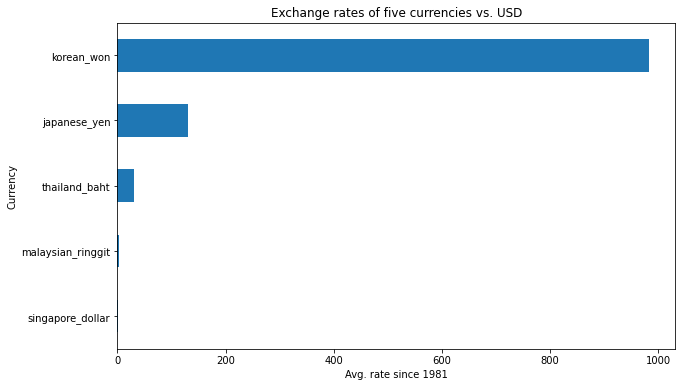

In [16]:
# calculate averages and plot
fig, ax = plt.subplots(figsize=(10, 6))

df_five_numeric.drop("date", axis=1).mean().sort_values().plot.barh(ax=ax)

ax.set(title="Exchange rates of five currencies vs. USD",
       xlabel="Avg. rate since {0}".format(df_five_numeric["date"].dt.year.min()),
       ylabel="Currency")

plt.show()

### 11. Now calculate the min and max rates per currency, and plot as a grouped bar chart

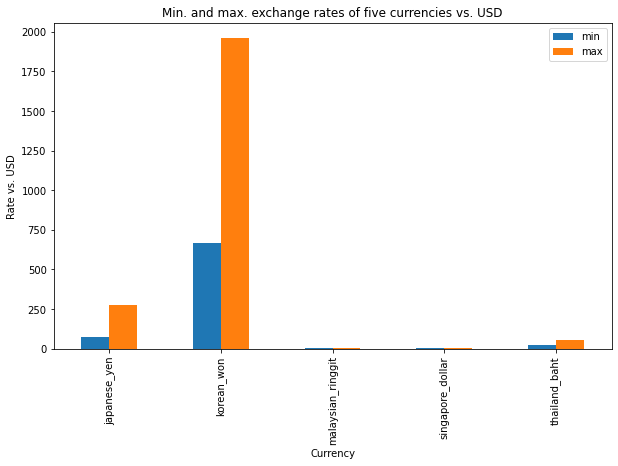

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

# easiest thing to do is put the data in the format matplotlib expects for grouped bars
# which is: rows are groups (in this case currencies) and columns are the bars within each group (the min and max rate)
df_five_numeric.drop("date", axis=1).agg(["min", "max"]).T.plot.bar(ax=ax)

ax.set(title="Min. and max. exchange rates of five currencies vs. USD",
       xlabel="Currency",
       ylabel="Rate vs. USD")

plt.show()

### 12. Plot the annual average value of your currencies using an appropriate plot

In [18]:
# Option 1: create a new column, "year" to group on and calculate the average

df_five_numeric["year"] = df_five_numeric["date"].dt.year
annual_avg = df_five_numeric.groupby("year")[currencies].mean()
annual_avg.head()

,japanese_yen,korean_won,malaysian_ringgit,singapore_dollar,thailand_baht
year,,,,,
1981,225.947363,686.073352,2.321537,2.122723,22.270440
1982,249.060120,731.944223,2.335578,2.140631,23.014343
1983,237.553506,776.049402,2.320451,2.113655,22.991673
1984,237.415344,807.828543,2.342158,2.132504,23.582874
1985,238.131471,872.361176,2.480658,2.199905,27.194118


In [19]:
# Option 2 (see time series class for more info): set the index of the DataFrame to the date column,
# and use `resample` to calculate annual averages
annual_avg = df_five_numeric.set_index("date")[currencies].resample("YS").mean()
annual_avg.head()

,japanese_yen,korean_won,malaysian_ringgit,singapore_dollar,thailand_baht
date,,,,,
1981-01-01,225.947363,686.073352,2.321537,2.122723,22.270440
1982-01-01,249.060120,731.944223,2.335578,2.140631,23.014343
1983-01-01,237.553506,776.049402,2.320451,2.113655,22.991673
1984-01-01,237.415344,807.828543,2.342158,2.132504,23.582874
1985-01-01,238.131471,872.361176,2.480658,2.199905,27.194118


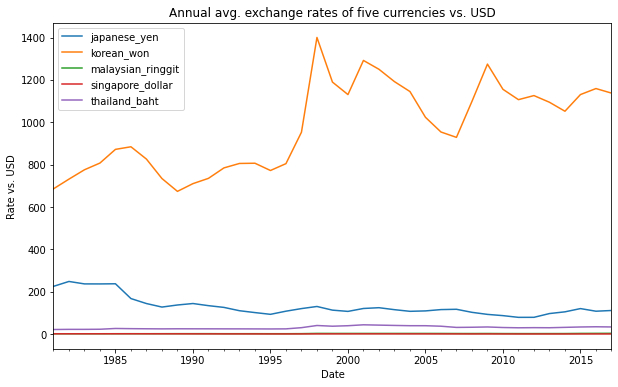

In [20]:
# Plot! If the data is in the right format, matplotlib knows what to do.
# The right format for time series is rows=dates and columns=lines

fig, ax = plt.subplots(figsize=(10, 6))

annual_avg.plot(ax=ax)

ax.set(title="Annual avg. exchange rates of five currencies vs. USD",
       xlabel="Date",
       ylabel="Rate vs. USD")

plt.show()

# Section 3: Descriptive statistics

### 13. Calculate the "five number summaries" for each of your 5 currencies

In [21]:
df_five_numeric[currencies].describe()

,japanese_yen,korean_won,malaysian_ringgit,singapore_dollar,thailand_baht
count,9018.000000,9018.000000,9018.000000,9018.000000,9018.000000
mean,130.791843,982.374647,3.133862,1.668942,31.387745
std,45.662356,206.531283,0.609096,0.294905,6.686676
min,75.720000,667.200000,2.237000,1.200700,20.360000
25%,104.942500,796.200000,2.551500,1.411625,25.430000
50%,117.580000,961.000000,3.107500,1.646500,30.800000
75%,134.060000,1148.992500,3.800000,1.849475,36.500000
max,277.650000,1960.000000,4.730000,2.308500,56.100000


### 14. Distributions

Plot the distribution of the exchange rate for Japanese yen. What can you conclude?

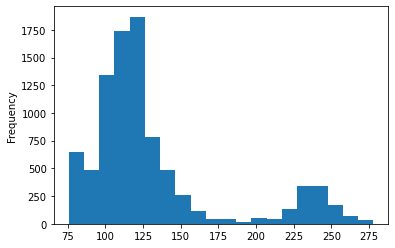

In [22]:
df_five_numeric["japanese_yen"].plot.hist(bins=20);

Looks bimodal, which suggests that the average value changed over time.

### 14. Distribution over time

Now group the data into decades and plot the distribution of the Japanese yen exchange rate for each decade.

Some steps you may want to go through:

- Create a "decade" column using the date column
- Create a distribution plot per decade (either a separate plot for each decade, or combine them somehow)

In [23]:
# One trick to calculate decade would be to take the year as a string,
# chop off the last number and replace with a 0
df_five_numeric["decade"] = df_five_numeric["year"].astype(str).str[:-1] + "0"
df_five_numeric[["year", "decade"]].head()

,year,decade
2685,1981,1980
2686,1981,1980
2687,1981,1980
2688,1981,1980
2689,1981,1980


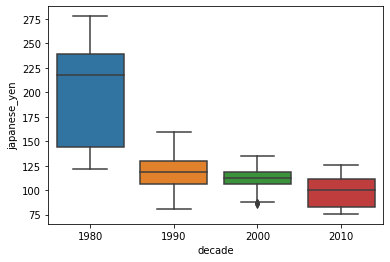

In [24]:
import seaborn as sns

sns.boxplot(data=df_five_numeric, x="decade", y="japanese_yen");

This clearly accounts for our bimodal distribution - any values that change significantly over time look strange when you plot them as a single distribution, without considering the variable that makes them vary (in this case: time)